#  <center>RECONNECT</center>
## <center>*Report for e-science course* </center>

## Abstract
text text text

## Acknowledgements
Data
Group members+supervisors
Scripts

## Introduction

The Artcic has during the last decades experienced a faster warming than any other part of the globe [REF]. The response to increased temperature in the Arctic environment implies reduction of sea ice cover and glaciers, melting permafrost and ecological pressure on the Arctic environment and species [REF]. Moreover, the interaction between the atmosphere, ocean and land is affected [bla bla marine production etc…………….]. 

The Arctic is in many ways an extreme environment which is also reflected in the annual cycle of airborne particulate matter. During the dark months, ocean and air circulation patterns implies an influx of anthropogenic pollutants, and the aerosol size distribution is dominated by accumulation mode particles. In combination with the Arctic wintertime meteorological conditions, this leads to the formation of a persistent Arctic haze. As the sun gradually returns, the circulation and airmass transport patterns changes and the anthropogenic pollution inflow is restricted [REF]. Formation of low-level clouds during summertime leads to removal of accumulation mode particles by wet scavenging marks the end of the Arctic Haze period [REF]. Consequently, the composition, properties, and size distribution of Arctic aerosol particle change. The lower aerosol load and increased availability of sunlight promotes photochemistry and results in a peak of in aerosol particles smaller than 100 nm [REF]. [Blab la NPF + precursor gases]
 At the Zeppelin mountain station [add location] long- term measurements are conducted to monitor the properties of aerosol particles, gaseous species and meteorological parameters (?). Long term measurements are valuable to discern changes…….


## Method

text text text

Describe what DMPS is and what bins are etc, cant be sassumed that reader knows what it is. Describe Zeppelin. 

### Import packages

And make sure that functions are auto-updated.

In [1]:
import DMPS_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc
import glob 


# Auto-update the functions. Useful if the functions have been altered. 
%load_ext autoreload
%autoreload 2

In [2]:
# Defining the path containg all DMPS data
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
# Using glob to import the files in the specified path
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

Loading each year of 30 min resolution DMPS data into a dataframe and create a list containing all dataframes.
Column headings are added, and data flagged as invalid is removed.

In [4]:
DFs_DMPS = fu.load_and_append_DMPS(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

### Concatenate DMPS data 
From the list containg one datafram per year, one datframe containg data from all years is created. The columns headings for the bin midpoint diameters are given in the  are renamed to names that are easier to handle

In [5]:
# Concatenate all the dataframes in list DFs_DMPS to one dataframe and drop unnessesary columns.
df_DMPS = fu.concat_df_DMPS(DFs_DMPS)

Define useful variables and rename the column headings to ease calling of specific columns:

In [6]:
# Get a list with the DMPS bin column names as strings 
bin_col_list = fu.get_bin_column_string_list()

# Rename the column headings for midpoint diameters to numeric values with less decimals.
df_DMPS = fu.renameDpColumns(df_DMPS, bin_col_list)

# Make a list of all the "real" non-rounded midpoint diameters as a list and as array.
diameterList, diameters = fu.getFloatDiameterListAndArray()

# Make a list of diameters as string-objects
diameters_as_strings = [str(x) for x in diameters]

### Resampling 
The function ``resample`` was used to convert the 30 min DMPS data to dataframes containing the daily mean, median and 1 hour average. The python function ``resample`` fills the gaps in the data by adding rows for gap days/months/hours with NaN-values to get a continous dataset. Because of this, rows containing only NaN values are dropped. 

In [7]:
df_daily_2010_2020_mean   = df_DMPS.resample('D').mean()
df_daily_2010_2020_mean   = df_daily_2010_2020_mean.dropna(how='all')

df_daily_2010_2020_median = df_DMPS.resample('D').median()
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all') 

df_hourly_2010_2020_mean  = df_DMPS.resample('H').mean()
df_hourly_2010_2020_mean  = df_hourly_2010_2020_mean.dropna(how='all')

Describe what the columns are in the data? Maybe this should be done at an earlier stage..

### Methods to identify NPF events
Some different methods are tested to identify the NPF events: 
* By calculation of $\frac{N_{D_p<10nm}}{N_{tot}}$ 
* By using K-means clustering
* By calculating the difference between the UF-CPC and the CPC 

The first method requires that the total number concentration $N_{tot}$ is calculated for a given diameter range. For that the log-normal distribution which is provided by the DMPS have to be integrated. Linn Karlsson (e-Science course participant 2017) should be acknowledged for inspiration to the method used in this work (Linn's method invloved the use of dictionaries but here arrays are used instead).  

The ``calcNtot`` calculates the particle concentration by integrating in a given bin midpoint diameter interval and adds a column in the dataframe containg the calculated values. 

In [8]:
# Calculate the total particle number concentration for:

# Daily median
df_daily_2010_2020_median_ntotCalc = fu.calcNtot(diameters, df_daily_2010_2020_median,diameters_as_strings)

# 30 min resolution data
df_DMPS_ntotCalc                   = fu.calcNtot(diameters, df_DMPS,diameters_as_strings) 

# 1 h resolution data
df_hourly_2010_2020_mean_ntotCalc  = fu.calcNtot(diameters, df_hourly_2010_2020_mean,diameters_as_strings) 

### Quality control of calcNtot function for 1h data

R-squared: 0.999363
Intercept: 0.0445901316076629
Slope: 1.0004705430431775


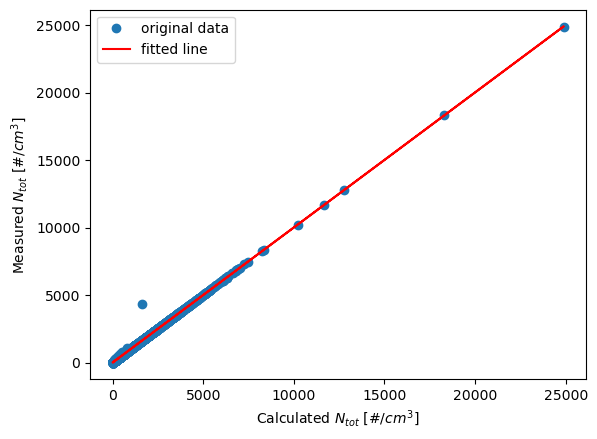

In [9]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

fu.compareIntegration(varx,vary)

### Compare $N_{D_P <x}/N_{tot}$ and compare UFCPC CPC

Integration of lognormal size distribution --> ($N_{D_P <x}$) 

The aim is to calculate the total particle number concentration (#/$cm^3)$ up to $x$ nm ($N_{D_P <x}$) and compute $N_{D_P <x}/N_{tot}$ to identify NPF events.  

In [10]:
# Defining the x = threshold up to which the integration should be performed. 
threshold = 10

bin_cols = fu.get_bins(bin_col_list)
bin_cols = [float(x) for x in bin_cols]

# bin_cols_LT10nm is the rounded column values as floats less than 10 nm
bin_cols_LT10nm = [x for x in bin_cols if x < threshold]


## Clustering 

Normalize the size distributions before clustering. This implies clustering by the shape of the distribution. The non-normalized approach implies taking into account the difference in particle number concentration in each mode which is a feature of the distribution, as for example NPF event implies a high number concntration of ultra-fine particles. Clustering the non-normalized size distributions was however unsuccesful in terms of physically reasonable size distributions. 

In [11]:
# Calling function to normalize size distributions 

df1, df_daily_2010_2020_median_norm = fu.create_normalised_df(df_daily_2010_2020_median)
df2, df_daily_2010_2020_mean_norm = fu.create_normalised_df(df_daily_2010_2020_mean)
df3, df_daily_2010_2020_1h_mean_norm = fu.create_normalised_df(df_hourly_2010_2020_mean)


#### Cluster normalized daily median and mean data and 1h hour mean

Define the number of clusters for K-means clustering

In [58]:
n_clusters = 11

#Perform K-means clustering
df_norm_clustered_median = fu.perform_clustering(df_daily_2010_2020_median_norm, n_clusters)
df_norm_clustered_mean = fu.perform_clustering(df_daily_2010_2020_mean_norm, n_clusters)

1 hour data needs special treatment:
Drop the 1st and two last bins before clustering **BUT WHY**?

In [59]:
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])
df_norm_clustered_1h_mean = fu.perform_clustering(df_hourly_norm_dropped, n_clusters)

In [60]:
# Check that x no of clusters are created
np.unique(df_norm_clustered_1h_mean['clusters'].values,return_counts=True)

(array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11], dtype=int64),
 array([1795, 2261, 5219, 2509, 2220, 3126, 2927, 4333, 4998, 3874],
       dtype=int64))

In [61]:
fu.checkUniqueModeDiam(df_norm_clustered_1h_mean,n_clusters)

Some clusters peak for the same diameter when number of clusters =  11 . Consider choosing other number of clusters.


#### Cluster 1h-mean data (normalized distributions)

In [16]:
# # Look at 1h mean clusters (from excluding the first bin)

# # I have dropped two last columns + first (bins that is)
# df_mean_1h_clusters = df_clustered_1h_mean.groupby('clusters').mean()
# df_std_1h_clusters  = df_clustered_1h_mean.groupby('clusters').std()

# fig, ax = plt.subplots(figsize=(8,2))

# for i in range(n_clusters):
#     ax.plot(diameters[1:-2]*10**9, df_mean_1h_clusters.iloc[i,:].values, '-')
    
#     ax.fill_between(diameters[1:-2]*10**9, df_mean_1h_clusters.iloc[i,:].values+df_std_1h_clusters.iloc[i,:].values,                    
#                         df_mean_1h_clusters.iloc[i,:].values-df_std_1h_clusters.iloc[i,:].values, alpha=0.2)
    
#     #ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, 'k-')
#     #ax.set_xticks(bin_cols[::5])
#     #ax.set_xscale('log')
#     #ax.set_yscale('log')
#     #ax.set_ylim(0,1.1)
# plt.xlabel('Dp [nm]')
# plt.title('1h mean clusters')
# plt.ylabel('Not norm concentration')
# plt.show()

In [17]:
# # Created df grouped by clusters
# df_median_clusters = df_norm_clustered_median.groupby('clusters').median()
# df_quantile10_clusters = df_norm_clustered_median.groupby('clusters').quantile(.1)
# df_quantile90_clusters = df_norm_clustered_median.groupby('clusters').quantile(.9)

# df_mean_clusters = df_norm_clustered_mean.groupby('clusters').mean()
# df_std_clusters = df_norm_clustered_mean.groupby('clusters').std()


In [18]:
# fig, ax = plt.subplots(figsize=(8,2))

# for i in range(n_clusters):
#     ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, '-')
#     ax.plot(diameters*10**9, df_mean_clusters.iloc[i,:].values, 'k-')
# #     ax.plot(diameters*10**9, df_median_clusters.iloc[[i]].values, '-')
# #     ax.plot(diameters*10**9, df_mean_clusters.iloc[[i]].values, 'k-')
#     ax.fill_between(diameters*10**9, df_quantile90_clusters.iloc[i,:].values,
#                         df_quantile10_clusters.iloc[i,:].values, alpha=0.2)
#     #ax.set_xticks(bin_cols[::5])
#     ax.set_xscale('log')
#     ax.set_ylim(0,1.1)
# plt.xlabel('Dp [nm]')
# plt.title('Median daily clusters')
# plt.ylabel('Normalised concentration')
# plt.show()

# # Check to see how mean daily clusters look like---------------------------------------


# fig, ax = plt.subplots(figsize=(8,2))

# for i in range(n_clusters):
#     ax.plot(diameters*10**9, df_mean_clusters.iloc[i,:].values, '-')
#     ax.fill_between(diameters*10**9, df_mean_clusters.iloc[i,:].values+df_std_clusters.iloc[i,:].values,                    
#                         df_mean_clusters.iloc[i,:].values-df_std_clusters.iloc[i,:].values, alpha=0.2)
#     ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, 'k-')
#     #ax.set_xticks(bin_cols[::5])
#     ax.set_xscale('log')
#     ax.set_ylim(0,1.1)
    
    
# plt.xlabel('Dp [nm]')
# plt.title('Mean daily clusters')
# plt.ylabel('Normalised concentration')
# plt.show()



## Figures for presentation: 1h data Clusters

In [19]:
# !!! Note that columns have been dropped !!!! -------------------------------------

df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)

df_norm_clustered_1h_mean_mean   = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std         = df_norm_clustered_1h_mean.groupby('clusters').std()

In [20]:
df_norm_clustered_1h_mean_median
#df_norm_clustered_1h_mean_mean.iloc[4,:].values)
np.unique(df_norm_clustered_1h_mean['clusters'].values,return_counts=True)

(array([1, 2, 3, 4, 5, 7], dtype=int64),
 array([ 2381,  3376,  3850,  3974, 12210,  7471], dtype=int64))

IndexError: single positional indexer is out-of-bounds

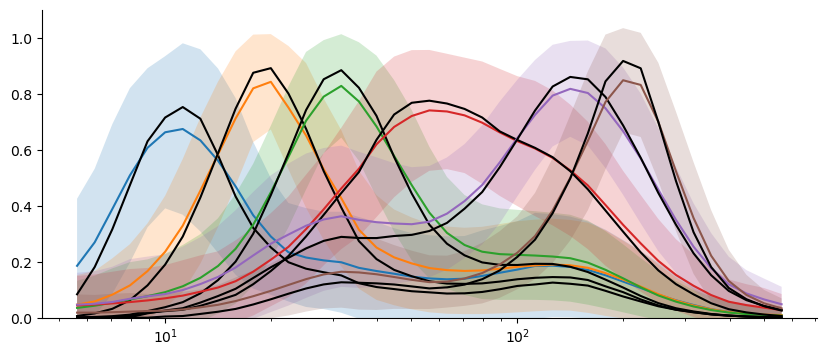

In [21]:
# Check to see how 1h mean clusters look like---------------------------------------

df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)


df_norm_clustered_1h_mean_mean = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std = df_norm_clustered_1h_mean.groupby('clusters').std()

fig, ax = plt.subplots(figsize=(10,4))

for i in range(n_clusters):
    ax.plot(diameters[1:-2]*10**9, df_norm_clustered_1h_mean_mean.iloc[i,:].values, '-')
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_norm_clustered_1h_mean_mean.iloc[i,:].values + df_norm_clustered_1h_std.iloc[i,:].values,                    
                    df_norm_clustered_1h_mean_mean.iloc[i,:].values - df_norm_clustered_1h_std.iloc[i,:].values, alpha=0.2)
    
    # Plot the median to see similarity
    ax.plot(diameters[1:-2]*10**9, df_norm_clustered_1h_mean_median.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_linewidth(3)
    
  
    
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters (mean+ 1std)')
plt.ylabel('Normalised concentration')
plt.show()



In [ ]:
# Median 1h mean clusters----------------------------------------------


fig, ax = plt.subplots(figsize=(10,4))

# Make a list of all cluster ID:s i.e.: 1,..,n_clusters
clusters = list(range(1,n_clusters+1,1))

for cluster in clusters:
    #print(cluster)
    df_cluster = df_norm_clustered_1h_mean_median[df_norm_clustered_1h_mean_median.index == cluster]
    df_cluster_mean = df_norm_clustered_1h_mean_mean[df_norm_clustered_1h_mean_mean.index == cluster]
    df_cluster90 = df_norm_clustered_1h_90q[df_norm_clustered_1h_90q.index == cluster]
    df_cluster10 = df_norm_clustered_1h_10q[df_norm_clustered_1h_10q.index == cluster]
    
    ax.plot(diameters[1:-2]*10**9, df_cluster.iloc[0,:].values, '-', 
            label='cluster: '+str(cluster))
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_cluster90.iloc[0,:].values,
                    df_cluster10.iloc[0,:].values,
                    alpha=0.2, )
    
    
    # Plot the mean to see similarity
    ax.plot(diameters[1:-2]*10**9, df_cluster_mean.iloc[0,:].values, 'k:',alpha=0.3)
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
    ax.spines[spine].set_linewidth(0.5)
    
plt.xlabel('Dp [nm]')
plt.title('K-means clustering (median+10/90th percentile)', loc='left')
plt.ylabel('$dN/dLogD_p$ (normalized)')
plt.legend(frameon=False,bbox_to_anchor=(.85, 1))
plt.show()

In [ ]:
#df_cluster.iloc[0,:].values

In [ ]:
#df_norm_clustered_1h_90q

### Look at trends in 1h mean data 

In [ ]:
# Create temporary copy
df_tmp = df_hourly_2010_2020_mean.copy(deep = True)
# df_tmp = df_tmp.drop(columns=['UFCPC','CPC3010','Ntot','flag'])
# # =['UFCPC','5.012','630.957','707.946','CPC3010','Ntot','flag'])

# In temporary copy of mean data add columns: 


# Create Nx/Ntot for 1 h mean data

df_tmp = fu.calcNtot(diameters[:len(bin_cols_LT10nm)+1], df_tmp,diameters_as_strings)
df_tmp_nxntot = df_tmp.copy(deep = True)

df_tmp_nxntot['NxNtot'] = df_tmp_nxntot['NtotCalc']/df_tmp_nxntot['Ntot']

# Drop NaN:s
df_tmp_nxntot = df_tmp_nxntot.dropna(subset =['NxNtot'])

# Look at annual cycle for NxNtot
df_tmp_nxntot_mean = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).mean()
df_tmp_nxntot_std = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).std()

df_tmp_nxntot_median = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).median()
df_tmp_nxntot_10q = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).quantile(0.1)
df_tmp_nxntot_90q = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).quantile(0.9)

# Create UF CPC/CPC ratio for 1 h mean data
df_tmp_rat =  df_tmp.copy(deep = True)
df_tmp_rat['ratio_CPCs'] = df_tmp_rat['UFCPC']/df_tmp_rat['CPC3010']

# Drop NaN:s
df_tmp_rat = df_tmp_rat.dropna(subset =['ratio_CPCs'])

df_1h_annual_cycle_rat_mean = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).mean()
df_1h_annual_cycle_rat_std = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).std()
8
df_1h_annual_cycle_rat_median = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).median()
df_1h_annual_cycle_rat_10q    = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).quantile(0.1)
df_1h_annual_cycle_rat_90q    = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).quantile(0.9)

# Create absolute diff Uf cpc - cpc----------------------------------------------------------

df_tmp['abs_diff'] = np.absolute(df_tmp['UFCPC']-df_tmp['CPC3010'])

df_tmp_adiff = df_tmp.copy(deep = True)

# Drop NaN's
df_tmp_adiff = df_tmp_adiff.dropna(subset =['abs_diff'])

df_1h_annual_cycle_adiff_mean = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).mean()
df_1h_annual_cycle_adiff_std = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).std()

df_1h_annual_cycle_adiff_median = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).median()
df_1h_annual_cycle_adiff_10q = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).quantile(0.1)
df_1h_annual_cycle_adiff_90q = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).quantile(0.9)

# Create diff UFcpc and cpc----------------------------------------------------------

df_tmp['diff_cpcs'] = df_tmp['UFCPC']-df_tmp['CPC3010']

# Have to drop nans!!!!!!!

df_tmp_diff = df_tmp.copy(deep = True)
df_tmp_diff = df_tmp_diff.dropna(subset =['diff_cpcs'])

df_1h_annual_cycle_diff_mean = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).mean()
df_1h_annual_cycle_diff_std = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).std()

df_1h_annual_cycle_diff_median = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).median()
df_1h_annual_cycle_diff_10q = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).quantile(0.1)
df_1h_annual_cycle_diff_90q = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).quantile(0.9)

#--------------------------------------------------------------------------------------------------

def makeTrendPlotsMean(dfMean, dfStd, xL, yL, tL):
    fig, axs = plt.subplots(1, figsize=(8, 5))
    axs.plot(dfMean.index, 
             dfMean.values,
             'o-', label= 'Mean')
    min_std = dfMean.values - dfStd.values
    #min_std[min_std<0]=0
    
    axs.fill_between(dfMean.index,
                dfMean.values + dfStd.values,
                min_std,
                alpha=0.2,label= '+/-1$\sigma$')
    axs.legend(frameon=False)
    axs.set_xlabel(xL)
    axs.set_ylabel(yL)
    axs.set_title(tL) 
    return fig, axs

def makeTrendPlotsMedian(dfMedian, dfUpperQ, dfLowerQ, UQ, LQ, xL, yL, tL):
    fig, axs = plt.subplots(1, figsize=(8, 5))
    axs.plot(dfMedian.index, 
             dfMedian.values,
             'ro-', label= 'Median')
    axs.fill_between(dfMedian.index,
                dfUpperQ,
                dfLowerQ,
                color ='r',alpha=0.2,label= str(LQ)+'-'+str(UQ)+' percentiles')
    axs.legend(frameon=False)
    axs.set_xlabel(xL)
    axs.set_ylabel(yL)
    axs.set_title(tL) 
    return fig, axs

# Plot ratios from calculated area ratio
fig1,axs1 = makeTrendPlotsMean(df_tmp_nxntot_mean,
                             df_tmp_nxntot_std,
                            'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) from calulated $N_x/N_{tot}$')

fig12,axs12 = makeTrendPlotsMedian(df_tmp_nxntot_median,
                            df_tmp_nxntot_90q,
                            df_tmp_nxntot_10q,
                            90,10,'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) $N_x/N_{tot}$')

# Plot cpc ratios

fig31,axs31 = makeTrendPlotsMean(df_1h_annual_cycle_rat_mean,
                             df_1h_annual_cycle_rat_std,
                            'Month','$CPC_{UF}/CPC$',
                            'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

fig32,axs32 = makeTrendPlotsMedian(df_1h_annual_cycle_rat_median,
                                    df_1h_annual_cycle_rat_90q,
                                    df_1h_annual_cycle_rat_10q,
                                    90,10,
                                    'Month','$CPC_{UF}/CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

# Plot abs diff cpc:s

fig41,axs41 = makeTrendPlotsMean(df_1h_annual_cycle_adiff_mean,
                             df_1h_annual_cycle_adiff_std,
                            'Month','$|CPC_{UF}-CPC|$',
                            'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')

fig42,axs42 = makeTrendPlotsMedian(df_1h_annual_cycle_adiff_median,
                                    df_1h_annual_cycle_adiff_90q,
                                    df_1h_annual_cycle_adiff_10q,
                                    90,10,
                                    'Month','$|CPC_{UF}-CPC|$',
                                    'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')
axs42.plot()

# Plot diff cpc:s
fig52,axs52 = makeTrendPlotsMean(df_1h_annual_cycle_diff_mean,
                                     df_1h_annual_cycle_diff_std,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')

fig61,axs61 = makeTrendPlotsMedian(df_1h_annual_cycle_diff_median,
                                    df_1h_annual_cycle_diff_90q,
                                    df_1h_annual_cycle_diff_10q,
                                    90,10,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')

fig62,axs62 = makeTrendPlotsMean(df_1h_annual_cycle_diff_mean,
                                     df_1h_annual_cycle_diff_std,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')
# print(df_hourly_2010_2020_mean_copy.shape)

# # Create abs(UF_CPC-CPC ) for 1 h mean data 
# df_hourly_2010_2020_mean_copy['absDiff'] = np.absolute( df_tmp['UFCPC']-df_tmp['CPC3010'])
# print(df_hourly_2010_2020_mean_copy.shape)


df_cluster = df_tmp_adiff.copy(deep = 'true')
# Create a column called day of year (DoY) which gives the day of the year 1 to 366
df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
df_cluster = df_cluster.dropna(subset =['DoY'])

# Calculate the occurence of cluster "cluster" per month
df_cluster_count = df_cluster.groupby('DoY').count()


# For presentation

In [ ]:
def makeTrendPlotsMedian2(dfMedian, dfUpperQ, dfLowerQ, UQ, LQ, xL, yL, tL):
    fig, axs = plt.subplots(1, figsize=(8, 5))
    axs.plot(dfMedian.index, 
             dfMedian.values,
             'ro-', label= 'Median $|CPC_{UF}-CPC$|')
    axs.fill_between(dfMedian.index,
                dfUpperQ,
                dfLowerQ,
                color ='r',alpha=0.2,label= str(LQ)+'-'+str(UQ)+' percentiles')
    axs.legend(frameon=False)
    axs.set_xlabel(xL)
    axs.set_ylabel(yL)
    axs.set_title(tL) 
    return fig, axs



# Plot abs diff cpc:s


fig66,axs66 = makeTrendPlotsMedian2(df_1h_annual_cycle_adiff_median,
                                    df_1h_annual_cycle_adiff_90q,
                                    df_1h_annual_cycle_adiff_10q,
                                    90,10,
                                    'Month','$|CPC_{UF}-CPC|$',
                                    '$|CPC_{UF}-CPC$|')
axs66.plot(df_1h_annual_cycle_adiff_mean.index,df_1h_annual_cycle_adiff_mean,'r',
          label = 'Mean $|CPC_{UF}-CPC$|', ls=':')
#axs66.legend(frameon=False) 


# Create a temporary copy of cluster-assigned data (normalized)
df_norm_clustered_1h_mean_copy = df_norm_clustered_1h_mean.copy()

clusters = [1, 2]


for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    axs66.plot(df_cluster_count.index, 
               df_cluster_count.iloc[:,0], 'o-', 
               label='cluster: '+str(cluster),
              alpha = 0.4, ls= ':')
    
    axs66.set_xlabel('Month')
    axs66.set_ylabel('Occurence')
    axs66.legend(frameon=False)
plt.legend(frameon=False,bbox_to_anchor=(1, 1))    
    

In [ ]:
df_cluster_count.head()

In [ ]:
# Create a temporary copy of cluster-assigned data (normalized)
df_norm_clustered_1h_mean_copy = df_norm_clustered_1h_mean.copy()

clusters = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)

fig, ax = plt.subplots(figsize=(10,5))

# Make stack plot from montly resample


fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)




# for cluster in clusters:
#     df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
#     df_cluster = df_cluster.copy()
    
#     # Create a column called day of year (DoY) which gives the day of the year 1 to 366
#     df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
#     # Calculate the occurence of cluster "cluster" per month
#     df_cluster_count = df_cluster.groupby('DoY').count()
    
#     # Plot the occurence of cluster X vs the day of year
#     ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], '-', label='cluster: '+str(cluster))
#     ax.set_xlabel('Day of Year')
#     ax.set_ylabel('Frequency')
#     ax.legend(frameon=False) 
    
# fig, ax = plt.subplots(figsize=(10,5))


# # Normalized

# for cluster in clusters:
#     df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
#     df_cluster = df_cluster.copy()
    
#     # Create a column called day of year (DoY) which gives the day of the year 1 to 366
#     df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
#     # Calculate the occurence of cluster "cluster" per month
#     df_cluster_count = df_cluster.groupby('DoY').count()
    
#     # Plot the occurence of cluster X vs the day of year
#     ax.plot(df_cluster_count.index,
#             df_cluster_count.iloc[:,0]/df_cluster_count.iloc[:,0].max(),
#             '-', label='cluster: '+str(cluster))
    
#     ax.set_xlabel('Day of Year')
#     ax.set_ylabel('Normalized Frequency')
#     ax.legend(frameon=False) 
    



In [ ]:
df_clusters_month = pd.DataFrame(columns=clusters)
print(df_clusters_month)
for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()    
    df_cluster.loc[:,'month'] =  df_cluster.index.month    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()    
    monthly_occurance = df_cluster_count.iloc[:,0].values
    print(monthly_occurance)
    df_clusters_month[cluster] = monthly_occurance
    
df_clusters_month['total_freq'] = df_clusters_month.sum(axis=1)
df_clusters_month = df_clusters_month.div(df_clusters_month['total_freq'], axis=0)    

In [ ]:
df_clusters_month

In [ ]:
df_clusters_month[clusters].plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2',
                    width = 0.9,            
                    figsize=(10, 6))



plt.ylabel("Normalized occurence")
plt.ylim(0,1)
plt.legend(title = 'Cluster:',frameon=False,bbox_to_anchor=(1, 1))
plt.xticks(np.arange(0, 12, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],)
plt.xticks(rotation = 45)

In [ ]:
df_cluster.loc[:,'date'] = df_cluster.index.map(datetime.datetime.toordinal) 
df_cluster.loc[:,'date'] = df_cluster.loc[:,'date'] - df_cluster.loc[:,'date'][0] + 1

### Make nice MJJ trend

In [ ]:
df_trend = df_norm_clustered_1h_mean_copy.copy()

# df_trend['Month'] = df_trend.index
# df_trend['Year']  =
dt_array = df_trend.index.values
df_trend['dtObjects'] = dt_array
df_trend['month_year'] = pd.to_datetime(df_trend['dtObjects']).dt.to_period('M')
df_trend['month'] = df_trend['dtObjects'].dt.month
df_trend['year'] = df_trend['dtObjects'].dt.year

clusters = [1, 2, 3, 4, 5]

# Create a dataframe from dictionaries as sometimes ther might not be any cluster 3 for example in some month --> 
# Problem that when we group by month-year we don't get the 

list_of_dicts = []
for cluster in clusters:
    df_cluster = df_trend[df_trend['clusters'] == cluster]
    df_cluster = df_cluster.copy()    
    #print(cluster)   
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count  = df_cluster.groupby('month_year').count()    
    monthly_occurance = df_cluster_count.iloc[:,0].values
    
    
    dict_cluster = dict(zip(df_cluster_count.index, monthly_occurance))
    
    #print(dict_cluster)
    list_of_dicts.append(dict_cluster)
    #print(list_of_dicts)

# ds is a dataframe whcih contains the rows = cluster no, and rows equal to month-year. 
df_clusters_seqMonth = pd.DataFrame(list_of_dicts)
#     print(monthly_occurance)
#     df_clusters_seqmonth[cluster] = monthly_occurance


In [ ]:
type(df_trend.index.values)

In [ ]:
# The days that have zero count get a Nan values that should be replaced by 0
df_clusters_seqMonth = df_clusters_seqMonth.replace(np.nan, 0)

df_clusters_seqMonth.loc['total'] = df_clusters_seqMonth.sum(axis=0)

In [ ]:
df_clusters_seqMonth

In [ ]:
str(df_clusters_seqMonth.columns.values[0])
datetimes = [pd.to_datetime(str(x)) for x in list(df_clusters_seqMonth.columns.values)]

In [ ]:
# Transform the data frame so clusters are columns 
df_T = df_clusters_seqMonth.T
df_T.index = datetimes
df_T['month'] = df_T.index.month

In [ ]:
df_T.columns = ['1','2','3','4','5','total', 'month']
df_T_summer = df_T[df_T.month.isin([5,6,7])] # Choosing the months

In [ ]:
df_T_summer = df_T_summer.sort_index()

In [ ]:
df_norm_summer = df_T_summer[['1', '2', '3', '4', '5']].div(df_T_summer['total'], axis=0)

In [ ]:
df_norm_summer.head()

In [ ]:
# Trend for MJJ

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_norm_summer.index,df_norm_summer['1'].values,'o' )
ax.set_ylabel('Normalized frequency')
ax.set_xlabel('Datetime')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))

#-----------Choosing the clusters---------------------------

cluster_name = '2'


ax.plot(df_norm_summer.index,
        df_norm_summer[cluster_name].values,
        'o',label='original data') 
ax.set_ylabel('Normalized frequency')
ax.set_xlabel('Datetime')
plt.show()

# Fit a lin regression slope is not what we want -we don't want correlation -we want trend
varx = np.arange(len(df_norm_summer.index))
vary = df_norm_summer[cluster_name].values

# # # mask = ~np.isnan(varx) & ~np.isnan(vary)
# res = sc.stats.linregress(varx, vary)

# print(f"R-squared: {res.rvalue**2:.6f}")

# fig, ax = plt.subplots(figsize=(10,5))
# plt.plot(varx,
#          vary,
#          'o', label='original data')
# plt.plot(varx,
#          res.intercept + res.slope*varx,
#          'r-', label='fitted line')
# plt.legend()
# plt.show()    
# plt.ylabel('N_tot')
# plt.xlabel('N_tot_calc')


# For trend analysis we use theil zen slope
slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

# medslope :Theil slope.
# medintercept : Intercept of the Theil line, as median(y) - medslope*median(x).
# lo_slope : Lower bound of the confidence interval on medslope.
# up_slope : Upper bound of the confidence interval on medslope.

print('---------------------------')
print('Theil-Sen slope')
print('Slope:',slope)
print('Intercept:',intercept)
print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
print('Upper bound of the confidence interval on medslopeLower:',up_slope)
print('---------------------------')

# Plot the Theil-Sen slope (non-parametric)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(varx, vary, 'b.',label='original data')
ax.plot(varx, intercept + slope * varx, 'b-')

ax.fill_between(varx, 
               intercept + up_slope * varx,
               intercept + lo_slope * varx,
               alpha=0.2, label= '95% Confidence $')
plt.show()
ax.legend()

# Test the sign of the slope



In [ ]:
df_norm_summer['year'] = df_norm_summer.index.year
df_norm_summer['year'] = df_norm_summer['year'] - df_norm_summer['year'].iloc[0]
df_norm_summer['month'] = df_norm_summer.index.month
df_norm_summer['month_ordered'] = df_norm_summer['year']*12 + df_norm_summer['month'] 
df_norm_summer['month_ordered'] = df_norm_summer['month_ordered'] - df_norm_summer['month_ordered'].iloc[0] + 1

In [ ]:
df_norm_summer

In [ ]:
#slice
df_norm_summer = df_norm_summer[df_norm_summer.index.year < 2018]

In [ ]:
cluster_name = '2'

# Fit a lin regression slope is not what we want -we don't want correlation -we want trend
varx = df_norm_summer['month_ordered'].values
vary = df_norm_summer[cluster_name].values

# For trend analysis we use theil zen slope
slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

print('---------------------------')
print('Theil-Sen slope')
print('Slope:',slope)
print('Intercept:',intercept)
print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
print('Upper bound of the confidence interval on medslopeLower:',up_slope)
print('---------------------------')

plt.rcParams['font.size'] = '15'
# Plot the Theil-Sen slope (non-parametric)
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ax.plot(df_norm_summer.index, df_norm_summer[cluster_name].values, 'x-', ls=':')
ax.set_ylabel('NPF events (normalized hours)')

ax2 = ax.twiny()
ax2.plot(varx, intercept + slope * varx, 'b-', ls='-', alpha=1, 
         label='y = '+str( round(slope, 3) )+'x +' +str(round(intercept,3) ))
ax2.fill_between(varx, 
               intercept + up_slope * varx,
               intercept + lo_slope * varx,
               alpha=0.2, label= '95% Confidence')
#ax.set_ylim(0,1)
ax2.set_xticks([])
ax2.set_title('Cluster 2: Trend MJJ')

for ax in [ax, ax2]:
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.legend(frameon=False)

# no = 10
# t = pd.date_range(start='2011-05-01',
#                   end='2021-05-01',
#                   periods=11)
# x_val_months = range(1,122,11)

#ax.set_xticks(df_norm_summer['month_ordered'].values[::6],  df_norm_summer.index[::6])

plt.ylim(0, 1)






In [ ]:
cluster_name = '1'

# Fit a lin regression slope is not what we want -we don't want correlation -we want trend
varx = df_norm_summer['month_ordered'].values
vary = df_norm_summer[cluster_name].values

# For trend analysis we use theil zen slope
slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

print('---------------------------')
print('Theil-Sen slope')
print('Slope:',slope)
print('Intercept:',intercept)
print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
print('Upper bound of the confidence interval on medslopeLower:',up_slope)
print('---------------------------')

# Plot the Theil-Sen slope (non-parametric)
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ax.plot(df_norm_summer.index, df_norm_summer[cluster_name].values, 'rx-', ls=':')
ax.set_ylabel('NPF events (normalized hours)')

ax2 = ax.twiny()
ax2.plot(varx, intercept + slope * varx, 'r-', ls='-', alpha=1, 
         label='y = '+str( round(slope, 3) )+'x +' +str(round(intercept,3) ))
ax2.fill_between(varx, 
               intercept + up_slope * varx,
               intercept + lo_slope * varx,
               alpha=0.2, label= '95% Confidence',
                facecolor = 'r')
#ax.set_ylim(0,1)
ax2.set_xticks([])
ax2.set_title('Cluster 1: Trend MJJ')

for ax in [ax, ax2]:
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.legend(frameon=False)

# no = 10
# t = pd.date_range(start='2011-05-01',
#                   end='2021-05-01',
#                   periods=11)
# x_val_months = range(1,122,11)

#ax.set_xticks(df_norm_summer['month_ordered'].values[::6],  df_norm_summer.index[::6])

plt.ylim(0, 1)




## Discussion

K-means: cluster by normalized vs non-normalized: Non-norm did not work but using the normalized distributions means that important features of the distribution signifying NPF event are lost (very high numb conc of ultrafine particles). Other methods for classyifying the DMPS data may prove helpful -**such as....?** and could be investigated in future studies.